In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

# Lấy dữ liệu dạng Dataframe từ file dữ liệu 
DATASET_inflation = pd.read_csv('https://raw.githubusercontent.com/phatjkk/world_inflation_data/main/world_CPI.csv')


In [ ]:
# Lấy số liệu của Việt Nam
VN_inflation = DATASET_inflation.T[257] # Vietnam
# Loại bỏ các năm có số liệu bị rỗng
VN_inflation = VN_inflation[4:].dropna()
print(VN_inflation)

1995      40.16572
1996     42.445125
1997     43.807412
1998     46.990546
1999     48.925195
2000     48.088409
2001     47.880886
2002      49.71512
2003      51.32323
2004     55.303319
2005     59.884963
2006     64.327239
2007     69.694993
2008     85.805303
2009     91.568831
2010         100.0
2011    118.677732
2012     129.47112
2013     138.00673
2014     143.64369
2015     144.55037
2016    148.407333
2017    153.631652
2018    159.069641
2019    163.516948
2020    168.783722
2021    171.880423
Name: 257, dtype: object


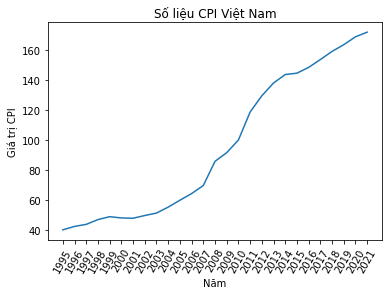

In [ ]:
# Vẽ biểu đồ trực quan hoá dữ liệu
import matplotlib.pyplot as plt
plt.plot(VN_inflation)
plt.title('Số liệu CPI Việt Nam')
plt.xlabel("Năm") 
plt.ylabel("Giá trị CPI")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Chuẩn hoá dữ liệu, scale dữ liệu về khoảng [0, 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
VN_inflation = sc.fit_transform(VN_inflation.to_numpy()
                                .reshape(-1,1).tolist())
VN_inflation = VN_inflation.flatten()

In [ ]:
# Phân lớp dữ liệu ra làm 2 phần X, Y
X,Y=[],[]
range_X = 5
for i in range(range_X,len(VN_inflation)):
    X.append(VN_inflation[i-range_X:i].tolist())
    Y.append(VN_inflation[i])

Y = np.array(Y).reshape(-1,1).tolist()

print(X)
print(Y)

[[0.0, 0.017305620328262217, 0.0276483332221526, 0.05181521272711931, 0.06650338979409387], [0.017305620328262217, 0.0276483332221526, 0.05181521272711931, 0.06650338979409387, 0.060150372057569346], [0.0276483332221526, 0.05181521272711931, 0.06650338979409387, 0.060150372057569346, 0.05857482364615646], [0.05181521272711931, 0.06650338979409387, 0.060150372057569346, 0.05857482364615646, 0.07250063851490013], [0.06650338979409387, 0.060150372057569346, 0.05857482364615646, 0.07250063851490013, 0.08470967221937686], [0.060150372057569346, 0.05857482364615646, 0.07250063851490013, 0.08470967221937686, 0.11492717588370127], [0.05857482364615646, 0.07250063851490013, 0.08470967221937686, 0.11492717588370127, 0.1497117782044728], [0.07250063851490013, 0.08470967221937686, 0.11492717588370127, 0.1497117782044728, 0.18343828497823844], [0.08470967221937686, 0.11492717588370127, 0.1497117782044728, 0.18343828497823844, 0.2241911662090602], [0.11492717588370127, 0.1497117782044728, 0.18343828

In [ ]:
from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu X, Y theo tỷ lệ 80/20 (80% training, 20% test)
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20,
                                                          shuffle=True,
                                                          random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
lstm_model=Sequential()
lstm_model.add(LSTM(units=128,return_sequences=True,
                    activation='relu',
                    input_shape=(range_X,1)))
lstm_model.add(LSTM(units=64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1))


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_training,y_training,epochs=150,batch_size=5,verbose=2)

Epoch 1/150
4/4 - 3s - loss: 0.3290 - 3s/epoch - 869ms/step
Epoch 2/150
4/4 - 0s - loss: 0.2513 - 109ms/epoch - 27ms/step
Epoch 3/150
4/4 - 0s - loss: 0.1878 - 118ms/epoch - 30ms/step
Epoch 4/150
4/4 - 0s - loss: 0.1213 - 70ms/epoch - 17ms/step
Epoch 5/150
4/4 - 0s - loss: 0.0713 - 91ms/epoch - 23ms/step
Epoch 6/150
4/4 - 0s - loss: 0.0268 - 79ms/epoch - 20ms/step
Epoch 7/150
4/4 - 0s - loss: 0.0513 - 126ms/epoch - 32ms/step
Epoch 8/150
4/4 - 0s - loss: 0.0355 - 98ms/epoch - 24ms/step
Epoch 9/150
4/4 - 0s - loss: 0.0260 - 60ms/epoch - 15ms/step
Epoch 10/150
4/4 - 0s - loss: 0.0303 - 75ms/epoch - 19ms/step
Epoch 11/150
4/4 - 0s - loss: 0.0325 - 77ms/epoch - 19ms/step
Epoch 12/150
4/4 - 0s - loss: 0.0176 - 127ms/epoch - 32ms/step
Epoch 13/150
4/4 - 0s - loss: 0.0267 - 74ms/epoch - 19ms/step
Epoch 14/150
4/4 - 0s - loss: 0.0112 - 56ms/epoch - 14ms/step
Epoch 15/150
4/4 - 0s - loss: 0.0181 - 120ms/epoch - 30ms/step
Epoch 16/150
4/4 - 0s - loss: 0.0114 - 107ms/epoch - 27ms/step
Epoch 17/150

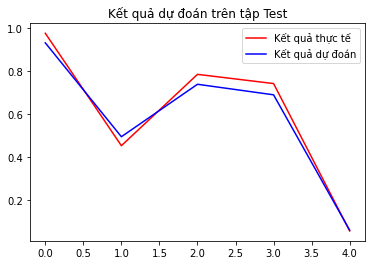

Mean Squared Error: 0.0017192606373638356
Root Mean Squared Error: 0.041463967940415875
R2 Score:  0.9831746398908735


In [ ]:

pred_y_test = lstm_model.predict(x_test)

x_ax=range(len(x_test))
plt.plot(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
pred_y_test = pred_y_test.tolist()

mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score: ",r2_score(y_test, pred_y_test))

